# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [104]:
#seu código aqui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [105]:
#seu código aqui
(df.isnull().sum() / len(df)) * 100

,0
customerID,0.00
Genero,0.48
Idoso,0.00
Casado,0.00
Dependents,0.00
Tempo_como_Cliente,0.00
PhoneService,59.28
Servico_Internet,0.00
Servico_Seguranca,0.00
Suporte_Tecnico,0.00


B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [106]:
#seu código aqui
df.dropna(subset='Genero', inplace=True)
(df.isnull().sum() / len(df)) * 100

,0
customerID,0.000000
Genero,0.000000
Idoso,0.000000
Casado,0.000000
Dependents,0.000000
Tempo_como_Cliente,0.000000
PhoneService,59.565916
Servico_Internet,0.000000
Servico_Seguranca,0.000000
Suporte_Tecnico,0.000000


**Optei por excluir os nulos da coluna Genero pois a porcentagem era muito baixa (0,48% do total de dados) e que representa uma perda de dados pouco relevante.  
Coincidentemente, ao tratar os dados nulos de Genero, os dados nulos de Churn também foram excluídos devido a uma sobreposição.**

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

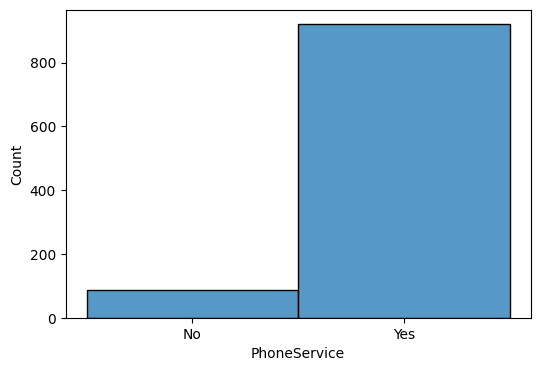

,proportion
PhoneService,
Yes,91.451292
No,8.548708


In [107]:
#seu código aqui
plt.figure(figsize=(6, 4))
sns.histplot(df['PhoneService'])
plt.show()

display(df['PhoneService'].value_counts(normalize=True) * 100)

**Para coluna PhoneService, a escolha foi por substituir os valores nulos pelo valor que mais aparece, Yes, uma vez que este representa 96,5% dos valores válidos**

In [108]:
df['PhoneService'] = df['PhoneService'].fillna('Yes')
df['PhoneService'].isnull().sum()

0

In [109]:
df['Pagamento_Mensal'].describe()

,Pagamento_Mensal
count,2175.000000
mean,65.607563
std,29.931520
min,18.400000
25%,39.500000
50%,71.450000
75%,90.250000
max,118.650000


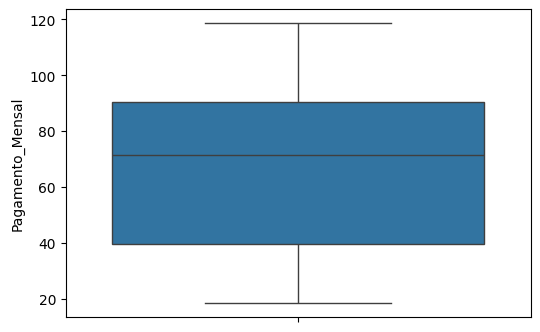

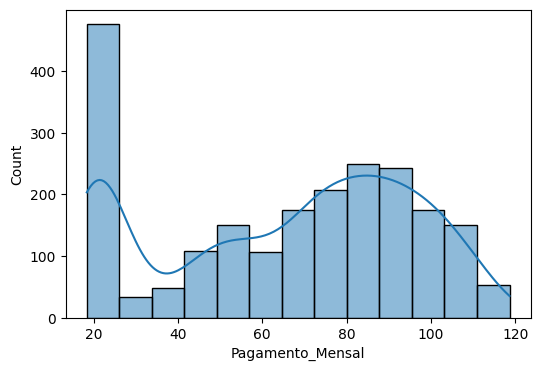

In [110]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Pagamento_Mensal')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Pagamento_Mensal', kde=True)
plt.show()

**No caso da coluna Pagamento_Mensal, a opção foi por utilizar a mediana. A média e a mediana têm uma alguma diferença e não há outliers. Portanto a distribuição é assimétrica, sendo, então, melhor a mediana por sofrer menos influência dessa assimetria.**

In [111]:
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].median())

In [112]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2488 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2488 non-null   int64  
 3   Casado              2488 non-null   object 
 4   Dependents          2488 non-null   object 
 5   Tempo_como_Cliente  2488 non-null   int64  
 6   PhoneService        2488 non-null   object 
 7   Servico_Internet    2488 non-null   object 
 8   Servico_Seguranca   2488 non-null   object 
 9   Suporte_Tecnico     2488 non-null   object 
 10  StreamingTV         2488 non-null   object 
 11  Tipo_Contrato       2488 non-null   object 
 12  PaymentMethod       2488 non-null   object 
 13  Pagamento_Mensal    2488 non-null   float64
 14  Total_Pago          2488 non-null   float64
 15  Churn               2488 non-null   object 
dtypes: float64(

None

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [113]:
#seu código aqui
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}': {unique_values}")

Valores únicos na coluna 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
Valores únicos na coluna 'Genero': ['Female' 'Male' 'F' 'M' 'f']
Valores únicos na coluna 'Idoso': [0 1]
Valores únicos na coluna 'Casado': ['Yes' 'No']
Valores únicos na coluna 'Dependents': ['No' 'Yes']
Valores únicos na coluna 'Tempo_como_Cliente': [ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]
Valores únicos na coluna 'PhoneService': ['No' 'Yes']
Valores únicos na coluna 'Servico_Internet': ['DSL' 'No' 'Fiber optic' 'dsl']
Valores únicos na coluna 'Servico_Seguranca': ['No' 'Yes' 'No internet service']
Valores únicos na coluna 'Suporte_Tecnico': ['No' 'Yes' 'No internet service']
Valores únicos na coluna 'StreamingTV': ['No' 'No internet service' 'Yes']
Valores únicos na coluna 'Tipo_Co

In [114]:
df['Genero'] = df['Genero'].replace({'F': 'Female', 'f': 'Female', 'M': 'Male'})
df['Servico_Internet'] = df['Servico_Internet'].replace({'dsl': 'DSL'})
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace({'No internet service': 'No'})
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}': {unique_values}")

Valores únicos na coluna 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']
Valores únicos na coluna 'Genero': ['Female' 'Male']
Valores únicos na coluna 'Idoso': [0 1]
Valores únicos na coluna 'Casado': ['Yes' 'No']
Valores únicos na coluna 'Dependents': ['No' 'Yes']
Valores únicos na coluna 'Tempo_como_Cliente': [ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]
Valores únicos na coluna 'PhoneService': ['No' 'Yes']
Valores únicos na coluna 'Servico_Internet': ['DSL' 'No' 'Fiber optic']
Valores únicos na coluna 'Servico_Seguranca': ['No' 'Yes']
Valores únicos na coluna 'Suporte_Tecnico': ['No' 'Yes']
Valores únicos na coluna 'StreamingTV': ['No' 'Yes']
Valores únicos na coluna 'Tipo_Contrato': ['Month-to-month' 'One year' 'Two year']
Valores únicos na coluna 'PaymentM

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand

In [115]:
df.drop(columns=['customerID'], inplace=True)

df.rename(columns={'PhoneService': 'Servico_Telefone', 'PaymentMethod': 'Metodo_Pagamento'}, inplace=True)

In [116]:
for column in df.columns:
    if df[column].isin(['Yes', 'No']).all():
        df[column] = df[column].replace({'Yes': 1, 'No': 0})
        df[column] = df[column].astype(int)
    if df[column].dtype == object:
        df[column] = df[column].str.lower()
    unique_values = df[column].unique()
    print(f"Valores únicos na coluna '{column}': {unique_values}")

Valores únicos na coluna 'Genero': ['female' 'male']
Valores únicos na coluna 'Idoso': [0 1]
Valores únicos na coluna 'Casado': [1 0]
Valores únicos na coluna 'Dependents': [0 1]
Valores únicos na coluna 'Tempo_como_Cliente': [ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]
Valores únicos na coluna 'Servico_Telefone': [0 1]
Valores únicos na coluna 'Servico_Internet': ['dsl' 'no' 'fiber optic']
Valores únicos na coluna 'Servico_Seguranca': [0 1]
Valores únicos na coluna 'Suporte_Tecnico': [0 1]
Valores únicos na coluna 'StreamingTV': [0 1]
Valores únicos na coluna 'Tipo_Contrato': ['month-to-month' 'one year' 'two year']
Valores únicos na coluna 'Metodo_Pagamento': ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
Valores únicos na coluna 'Pagamento_Mensal': [ 29.85  56.95 

<ipython-input-116-55f19ab5c065>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'Yes': 1, 'No': 0})
<ipython-input-116-55f19ab5c065>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'Yes': 1, 'No': 0})
<ipython-input-116-55f19ab5c065>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_